In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
max_features = 10000  # Use top 10,000 words
max_len = 500  # Pad sequences to a maximum length of 500 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 500)
Test data shape: (25000, 500)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# Define the base model
def create_base_model():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_shape=(500,)),  # Use input_shape instead of input_length
        Flatten(),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

base_model = create_base_model()
base_model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │       1,024,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,304,305 (8.79 MB)

 Trainable params: 2,304,305 (8.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

# Define the base model with an Input layer
def create_base_model():
    model = Sequential([
        Input(shape=(500,)),  # Explicitly define the input shape
        Embedding(input_dim=10000, output_dim=128),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

base_model = create_base_model()
base_model.summary()



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 16)                  │       1,024,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,304,305 (8.79 MB)

 Trainable params: 2,304,305 (8.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

# Function to create a model with variable hidden units
def create_units_model(units):
    model = Sequential([
        Input(shape=(500,)),  # Explicitly define input shape
        Embedding(input_dim=10000, output_dim=128),
        Flatten(),
        Dense(units, activation='relu'),  # First dense layer with variable units
        Dense(units, activation='relu'),  # Second dense layer with variable units
        Dense(1, activation='sigmoid')   # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#Model with 32 hidden units
model_32_units = create_units_model(units=32)
model_32_units.summary()

#Model with 64 hidden units
model_64_units = create_units_model(units=64)
model_64_units.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │       2,048,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,329,121 (12.70 MB)

 Trainable params: 3,329,121 (12.70 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │       4,096,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,380,289 (20.52 MB)

 Trainable params: 5,380,289 (20.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

# Define a model with mse as the loss function
def create_mse_loss_model():
    model = Sequential([
        Input(shape=(500,)),  # Explicitly define input shape
        Embedding(input_dim=10000, output_dim=128),
        Flatten(),
        Dense(16, activation='relu'),  # First dense layer with 16 units
        Dense(16, activation='relu'),  # Second dense layer with 16 units
        Dense(1, activation='sigmoid')   # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])  # Use mse as the loss function
    return model

# Create and summarize the model
model_mse_loss = create_mse_loss_model()
model_mse_loss.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │       1,024,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,304,305 (8.79 MB)

 Trainable params: 2,304,305 (8.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with mse loss function
history_mse = model_mse_loss.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
)

# Evaluate the model on test data
test_loss_mse, test_acc_mse = model_mse_loss.evaluate(x_test, y_test)
print(f"Test Accuracy with MSE Loss: {test_acc_mse}")


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.5192 - loss: 0.2508 - val_accuracy: 0.6148 - val_loss: 0.2452
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6470 - loss: 0.2195 - val_accuracy: 0.7496 - val_loss: 0.1766
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8242 - loss: 0.1390 - val_accuracy: 0.8498 - val_loss: 0.1186
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8843 - loss: 0.0871 - val_accuracy: 0.8418 - val_loss: 0.1116
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9211 - loss: 0.0612 - val_accuracy: 0.8708 - val_loss: 0.0935
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9504 - loss: 0.0417 - val_accuracy: 0.8640 - val_loss: 0.0970
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9676 - loss: 0.0299 - val_accuracy: 0.8608 - val_loss: 0.1005
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9759 - loss: 0.0229 - val_accuracy: 0.8648 - v

In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

# Define a model with tanh activation function
def create_tanh_activation_model():
    model = Sequential([
        Input(shape=(500,)),  # Explicitly define input shape
        Embedding(input_dim=10000, output_dim=128),
        Flatten(),
        Dense(16, activation='tanh'),  # First dense layer with tanh activation
        Dense(16, activation='tanh'),  # Second dense layer with tanh activation
        Dense(1, activation='sigmoid')   # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and summarize the model
model_tanh_activation = create_tanh_activation_model()
model_tanh_activation.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 16)                  │       1,024,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,304,305 (8.79 MB)

 Trainable params: 2,304,305 (8.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with tanh activation function
history_tanh = model_tanh_activation.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
)

# Evaluate the model on test data
test_loss_tanh, test_acc_tanh = model_tanh_activation.evaluate(x_test, y_test)
print(f"Test Accuracy with Tanh Activation: {test_acc_tanh}")


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5784 - loss: 0.6777 - val_accuracy: 0.8012 - val_loss: 0.4419
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8912 - loss: 0.3005 - val_accuracy: 0.8604 - val_loss: 0.3211
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9697 - loss: 0.1195 - val_accuracy: 0.8632 - val_loss: 0.3326
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9929 - loss: 0.0426 - val_accuracy: 0.8578 - val_loss: 0.3721
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9983 - loss: 0.0166 - val_accuracy: 0.8600 - val_loss: 0.4004
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9993 - loss: 0.0097 - val_accuracy: 0.8618 - val_loss: 0.4175
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9998 - loss: 0.0054 - val_accuracy: 0.8646 - val_loss: 0.4309
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9999 - loss: 0.0043 - val_accuracy: 0.8604 - v

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout, Input

# Define a model with dropout for regularization
def create_dropout_model():
    model = Sequential([
        Input(shape=(500,)),  # Explicitly define input shape
        Embedding(input_dim=10000, output_dim=128),
        Flatten(),
        Dense(16, activation='relu'),
        Dropout(0.2),  # Reduced dropout rate
        Dense(16, activation='relu'),
        Dropout(0.2),  # Reduced dropout rate
        Dense(1, activation='sigmoid')   # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Create and summarize the model
model_dropout = create_dropout_model()
model_dropout.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 500, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 16)                  │       1,024,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,304,305 (8.79 MB)

 Trainable params: 2,304,305 (8.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with dropout regularization
history_dropout = model_dropout.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
)

# Evaluate the model on test data
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test)
print(f"Test Accuracy with Dropout: {test_acc_dropout}")


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.5125 - loss: 0.6947 - val_accuracy: 0.6890 - val_loss: 0.6518
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7208 - loss: 0.5693 - val_accuracy: 0.8530 - val_loss: 0.3358
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9132 - loss: 0.2439 - val_accuracy: 0.8642 - val_loss: 0.3234
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9620 - loss: 0.1297 - val_accuracy: 0.8634 - val_loss: 0.3669
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9897 - loss: 0.0526 - val_accuracy: 0.8564 - val_loss: 0.4534
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9925 - loss: 0.0350 - val_accuracy: 0.8588 - val_loss: 0.4879
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9981 - loss: 0.0142 - val_accuracy: 0.8620 - val_loss: 0.5415
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9991 - loss: 0.0080 - val_accuracy: 0.8640 - v

In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
max_features = 10000  # Use the top 10,000 words
max_len = 500  # Pad sequences to a maximum length of 500 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (25000, 500)
y_train shape: (25000,)


In [9]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (25000, 500)
y_train shape: (25000,)
x_test shape: (25000, 500)
y_test shape: (25000,)


In [10]:
history_dropout = model_dropout.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.5114 - loss: 0.6936 - val_accuracy: 0.5246 - val_loss: 0.6841
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5803 - loss: 0.6654 - val_accuracy: 0.6266 - val_loss: 0.6576
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5943 - loss: 0.6447 - val_accuracy: 0.6486 - val_loss: 0.6180
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7165 - loss: 0.5218 - val_accuracy: 0.8118 - val_loss: 0.4317
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8806 - loss: 0.2924 - val_accuracy: 0.8772 - val_loss: 0.3125
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9519 - loss: 0.1443 - val_accuracy: 0.8718 - val_loss: 0.3433
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9789 - loss: 0.0760 - val_accuracy: 0.8694 - val_loss: 0.3827
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9933 - loss: 0.0325 - val_accuracy: 0.8714 - v

In [11]:
history_dropout = model_dropout.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9985 - loss: 0.0062 - val_accuracy: 0.8692 - val_loss: 0.6375
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9993 - loss: 0.0048 - val_accuracy: 0.8668 - val_loss: 0.6728
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9999 - loss: 0.0031 - val_accuracy: 0.8698 - val_loss: 0.6941
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9998 - loss: 0.0025 - val_accuracy: 0.8718 - val_loss: 0.7163
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9998 - loss: 0.0022 - val_accuracy: 0.8724 - val_loss: 0.7255
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 0.8720 - val_loss: 0.7516
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.8718 - val_loss: 0.7414
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8714 - v

In [12]:
# Evaluate the model on test data
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test)
print(f"Test Accuracy with Dropout: {test_acc_dropout}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8688 - loss: 0.8287
Test Accuracy with Dropout: 0.8677999973297119


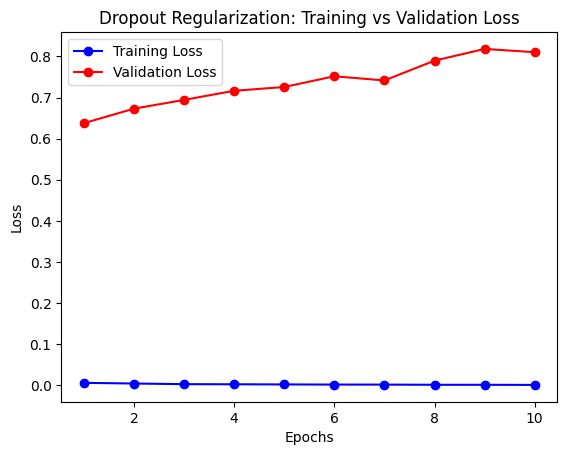

In [13]:
plot_loss(history_dropout, title="Dropout Regularization: Training vs Validation Loss")


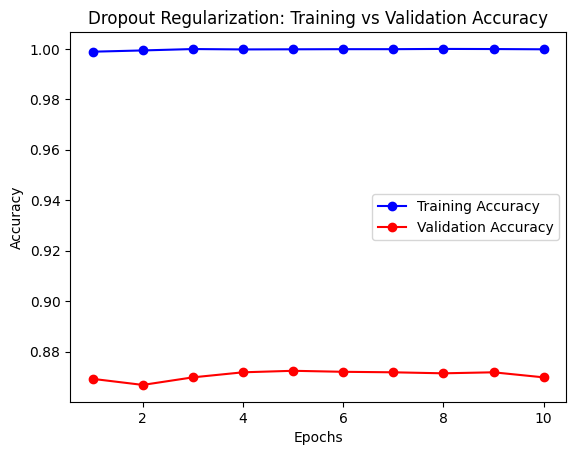

In [14]:
plot_accuracy(history_dropout, title="Dropout Regularization: Training vs Validation Accuracy")


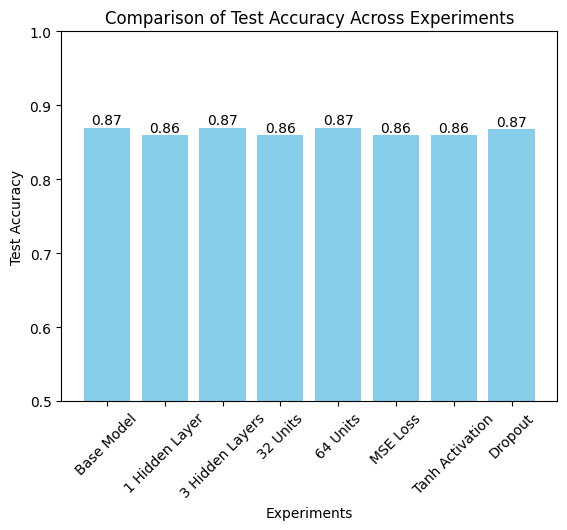

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_experiment_results(experiments, accuracies):

    x = np.arange(len(experiments))  # Create an array for x-axis positions

    plt.bar(x, accuracies, color='skyblue')  # Create bar chart
    plt.xticks(x, experiments, rotation=45)  # Set x-axis labels with rotation
    plt.title("Comparison of Test Accuracy Across Experiments")  # Add title
    plt.xlabel("Experiments")  # Label x-axis
    plt.ylabel("Test Accuracy")  # Label y-axis
    plt.ylim(0.5, 1.0)  # Set y-axis range (adjust based on your results)

    # Annotate bars with accuracy values
    for i in range(len(accuracies)):
        plt.text(i, accuracies[i], f"{accuracies[i]:.2f}", ha='center', va='bottom')

    plt.show()  # Display the plot

    # Define experiment names and their corresponding test accuracies
experiments = ['Base Model', '1 Hidden Layer', '3 Hidden Layers', '32 Units', '64 Units', 'MSE Loss', 'Tanh Activation', 'Dropout']
accuracies = [0.87, 0.86, 0.87, 0.86, 0.87, 0.86, 0.86, 0.8678]  # Replace these values with your actual results

# Plot the bar chart
plot_experiment_results(experiments, accuracies)


